In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [57]:
#Import the relevant libraries
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
brainData = pd.read_csv("~/GitRepos/high-dimensionality-prediction/DataCSVs/AllParticipantVoxels.csv")
#brainData.head()

subList = brainData.SubID
subList

0     OAS2_0002
1     OAS2_0005
2     OAS2_0007
3     OAS2_0012
4     OAS2_0013
5     OAS2_0017
6     OAS2_0018
7     OAS2_0020
8     OAS2_0027
9     OAS2_0031
10    OAS2_0034
11    OAS2_0036
12    OAS2_0037
13    OAS2_0040
14    OAS2_0041
15    OAS2_0044
16    OAS2_0048
17    OAS2_0049
18    OAS2_0051
19    OAS2_0057
20    OAS2_0058
21    OAS2_0061
22    OAS2_0062
23    OAS2_0064
24    OAS2_0067
25    OAS2_0070
26    OAS2_0073
27    OAS2_0076
28    OAS2_0078
29    OAS2_0079
30    OAS2_0080
31    OAS2_0090
32    OAS2_0095
Name: SubID, dtype: object

In [32]:
#Load in the demographic dataset
demographicData = pd.read_csv('oasis2_longitudinal_demographics.csv')
demographicData = demographicData[demographicData["Subject ID"].isin(subList)]
#Show the head of the data
demographicData.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032


In [33]:
x = brainData.drop(["SubID"],axis=1)
x.head()

,Amygdala,CSF,Cerebellum-Cortex,Cerebral-White-Matter,Hippocampus,Inf-Lat-Vent,Lateral-Ventricle,WM-hypointensities,entorhinal,fusiform,inferiorparietal,inferiortemporal,lateraloccipital,lingual,middletemporal,precentral,precuneus,superiorfrontal,superiortemporal,supramarginal
0,0.01090,0.01384,0.64235,2.64652,0.03383,0.02169,0.37901,0.03773,0.00943,0.07187,0.12313,0.10346,0.17527,0.08270,0.10303,0.14672,0.11603,0.29188,0.16893,0.11827
1,0.01928,0.01147,0.67281,2.22069,0.04829,0.02835,0.39614,0.20058,0.01933,0.07474,0.14054,0.12228,0.12808,0.06932,0.14013,0.12669,0.11210,0.26987,0.15631,0.10208
2,0.01221,0.00913,0.68121,2.01121,0.03682,0.01196,0.21289,0.04204,0.00976,0.06315,0.10326,0.12009,0.10754,0.06160,0.12457,0.13513,0.07985,0.27373,0.16834,0.10123
3,0.01293,0.00704,0.50157,2.12969,0.03822,0.01437,0.17211,0.08778,0.01371,0.06291,0.10832,0.10720,0.10090,0.05172,0.11458,0.11432,0.08125,0.21082,0.15030,0.08696
4,0.01549,0.00901,0.47548,1.78174,0.03527,0.01007,0.22184,0.02896,0.01355,0.06526,0.12498,0.11321,0.12555,0.06306,0.11340,0.12562,0.08601,0.22578,0.15815,0.08574


In [34]:
#Filter so it's only the third visit
demographicData3 = demographicData[demographicData.Visit ==3]

demographicData3.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
21,OAS2_0012,OAS2_0012_MR3,Nondemented,3,1598,F,R,83,16,2.0,29.0,0.0,1323,0.718,1.327
24,OAS2_0013,OAS2_0013_MR3,Nondemented,3,1456,F,R,85,12,4.0,29.0,0.0,1225,0.710,1.433


In [36]:
#Establish the variables we are fitting torwards
y_MMSE = demographicData3['MMSE']
y_CDR = demographicData3['CDR']

In [37]:

#This function splits the x data and y data into training and testing cohorts (50% go to test cohort)
xTrain, xTest, MMSE_Train, MMSE_Test = train_test_split(x, y_MMSE, test_size=0.5)
xTrain, xTest, CDR_Train, CDR_Test = train_test_split(x, y_CDR, test_size=0.5)

In [47]:
#Functions for training the SVM and the RF

def runSVM(xTraining, yTraining, xTesting, yTesting, kernelType, tuneHyperparameters):
    svRegress = svm.SVR(kernel=kernelType)
    svRegress.fit(xTraining,yTraining)
    svRegress_predict = svRegress.predict(xTesting)
    #svRegress_acc = metrics.accuracy_score(yTesting, svRegress_predict)
    return svRegress, svRegress_predict

def runRF(xTraining, yTraining, xTesting, yTesting, tuneHyperparameters):
    randForest = MMSE_Forest = RandomForestRegressor()
    randForest.fit(xTraining,yTraining)
    randForest_predict = randForest.predict(xTesting)
    #randForest_acc = metrics.accuracy_score(yTesting, randForest_predict)
    return randForest, randForest_predict

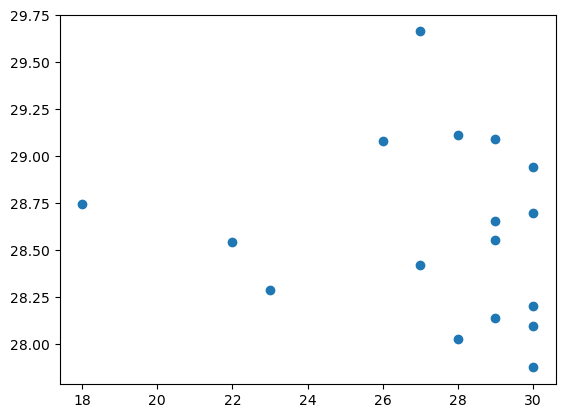

In [61]:
#Create the SVC to predict MMSE
MMSE_SVR, MMSE_SVR_predict = runSVM(xTrain, MMSE_Train, xTest, MMSE_Test, 'linear', False)
#print("Support Vector Regression MMSE Accuracy: ", MMRE_SVR_acc)
plt.scatter(MMSE_Test, MMSE_SVR_predict)

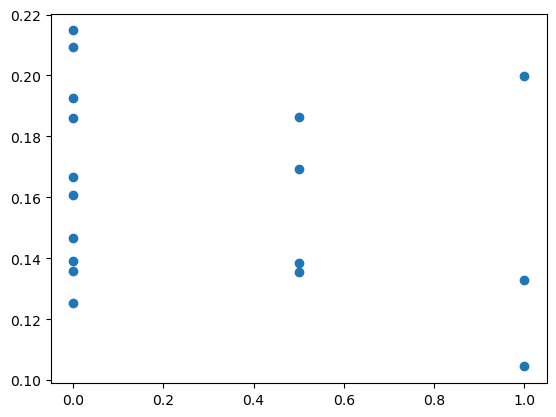

In [62]:
#Create the SVC to predict CDR
CDR_SVR, CDR_SVR_predict= runSVM(xTrain, CDR_Train, xTest, CDR_Test, 'linear', False)
plt.scatter(CDR_Test, CDR_SVR_predict)

In [54]:
#Create the RF to predict MMSE
MMSE_RF, MMSE_RF_predict = runRF(xTrain, MMSE_Train, xTest, MMSE_Test, False)

In [55]:
#Create the RF to predict CDR
CDR_RF, CDR_RF_predict = runRF(xTrain, CDR_Train, xTest, CDR_Test, False)